In [3]:
import pandas as pd
from datetime import datetime
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('covid_clean.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-12,NaN,0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-19,NaN,0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-02,NaN,0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [6]:
data.shape

(48877, 67)

In [5]:
data[data['date'].dt.year < 2023].shape[0]

36338

In [6]:
for location in data['location'].unique():
    data_location = data[data['location'] == location]
    print(location)
    # for i in range(data_location.shape[0]):
    #     print(i)
    print(data_location.shape)

Afghanistan
(210, 67)
Albania
(210, 67)
Algeria
(210, 67)
American Samoa
(210, 67)
Andorra
(210, 67)
Angola
(210, 67)
Anguilla
(210, 67)
Antigua and Barbuda
(210, 67)
Argentina
(210, 67)
Armenia
(210, 67)
Aruba
(210, 67)
Australia
(210, 67)
Austria
(210, 67)
Azerbaijan
(210, 67)
Bahamas
(210, 67)
Bahrain
(210, 67)
Bangladesh
(210, 67)
Barbados
(210, 67)
Belarus
(210, 67)
Belgium
(210, 67)
Belize
(209, 67)
Benin
(210, 67)
Bermuda
(210, 67)
Bhutan
(210, 67)
Bolivia
(210, 67)
Bonaire Sint Eustatius and Saba
(210, 67)
Bosnia and Herzegovina
(210, 67)
Botswana
(210, 67)
Brazil
(210, 67)
British Virgin Islands
(210, 67)
Brunei
(210, 67)
Bulgaria
(210, 67)
Burkina Faso
(210, 67)
Burundi
(209, 67)
Cambodia
(210, 67)
Cameroon
(210, 67)
Canada
(210, 67)
Cape Verde
(210, 67)
Cayman Islands
(210, 67)
Central African Republic
(210, 67)
Chad
(210, 67)
Chile
(210, 67)
China
(210, 67)
Colombia
(210, 67)
Comoros
(210, 67)
Congo
(210, 67)
Cook Islands
(210, 67)
Costa Rica
(210, 67)
Cote d'Ivoire
(210, 6

In [7]:
data[data['new_cases'].notna()].shape

(48877, 67)

In [8]:
columns_for_imputation = ['new_cases']

imputer = KNNImputer(n_neighbors=5)

data[columns_for_imputation] = imputer.fit_transform(data[columns_for_imputation])

data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-19,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-02,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
y = data.new_cases
X = data.drop("new_cases", axis = 1)

In [9]:
data.corr()['new_cases'].sort_values()[:-1]

cardiovasc_death_rate    -0.044462
extreme_poverty          -0.038454
tests_per_case           -0.015525
diabetes_prevalence      -0.006648
population_density       -0.005549
                            ...   
weekly_icu_admissions     0.556554
new_tests                 0.562038
icu_patients              0.627629
weekly_hosp_admissions    0.756245
hosp_patients             0.774996
Name: new_cases, Length: 61, dtype: float64

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr()['new_cases'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (62, 1) and (62,))

<Figure size 576x432 with 0 Axes>

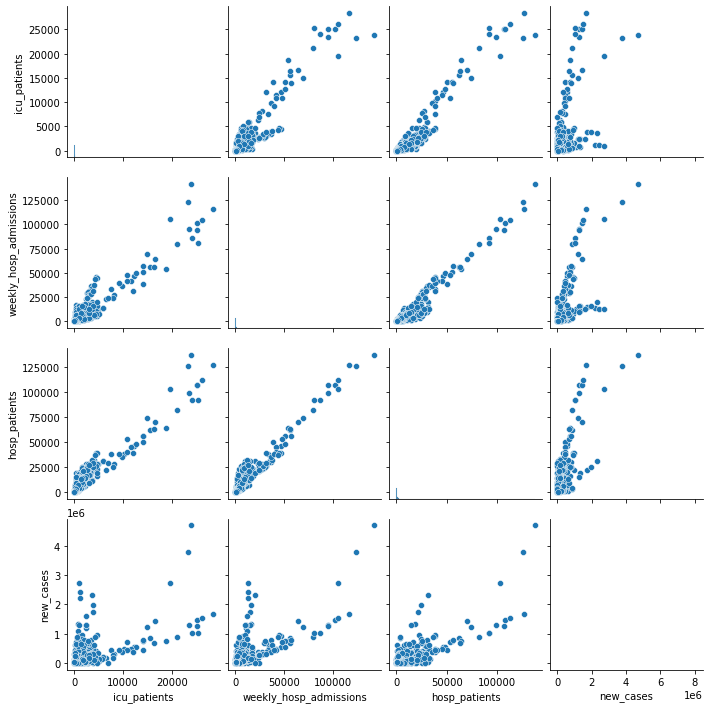

In [9]:
sns.pairplot(data.sample(frac=0.4, random_state=42)[['icu_patients', 'weekly_hosp_admissions', 'hosp_patients', 'new_cases']])
plt.show()

In [28]:
df = pd.read_csv('covid_clean.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df[df['date'].dt.year < 2024]

df = df[df['continent'] == 'Asia']

df = df.set_index('date')
df.index = pd.to_datetime(df.index)

df = df.groupby(['location', 'date']).agg({'new_cases': 'sum'}).reset_index()

<AxesSubplot:xlabel='date', ylabel='new_cases'>

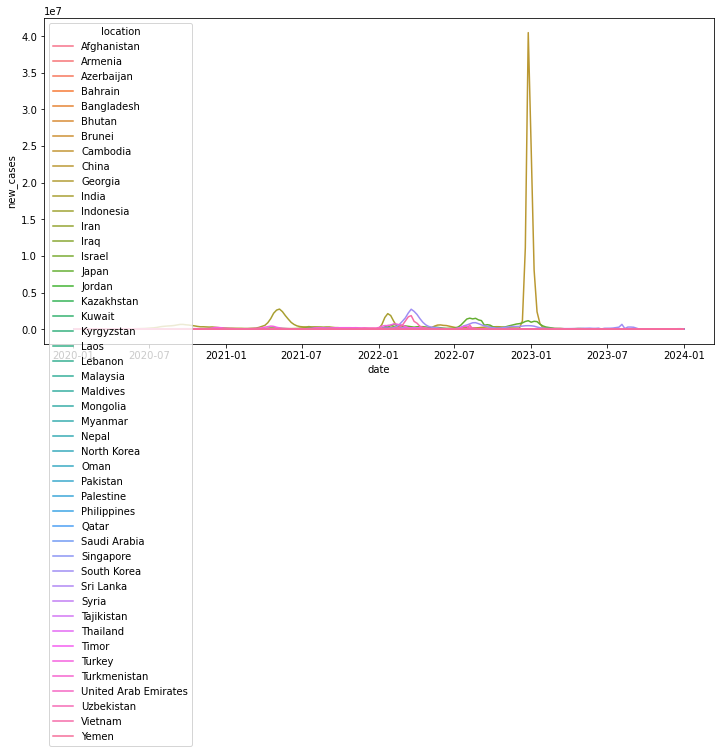

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', hue='location', data=df)

In [31]:
df.nlargest(5, 'new_cases')

,location,date,new_cases
1827,China,2022-12-25,40475477
1828,China,2023-01-01,24644876
1826,China,2022-12-18,11098550
1829,China,2023-01-08,8061762
2160,India,2021-05-09,2738957
